### Kim og Kristines kode

In [2]:
# Code written by Kim Lefmann in Matlab and converted to python by Kristine Krighaar

import numpy as np
import matplotlib.pyplot as plt
import warnings
from numpy import linalg as LA
import matplotlib as mpl
mpl.rcParams['figure.figsize']   = (6,4)
mpl.rcParams['lines.linewidth'] = 0.9
mpl.rcParams['errorbar.capsize'] = 2
mpl.rcParams['lines.markersize'] = 5
mpl.rcParams['font.size']        = 20 # standard er 45
mpl.rcParams['font.serif'] = 'Computer Modern Roman'
mpl.rcParams['ytick.right'] = True
mpl.rcParams['xtick.top'] = True
mpl.rcParams['xtick.direction']='in'
mpl.rcParams['ytick.direction']='in'
plt.rcParams['figure.constrained_layout.use'] = True
import pandas as pd
#print(mpl.rcParams.keys())

In [3]:
#Born - von Karman phonon calculation
# Hexagonal Pyrolytic Graphite
to_meV = 4.136
q2q = 0.1/114  # Conversion from mm on zoomed picture to rlu
E2E = 2/91     # Conversion from mm on zoomed picture to THz

Data_100_q_ta =       np.array([0.02, 0.04, 0.06, 0.08, 0.10, 0.12, 0.145, 0.20, 0.25, 0.295]) #measured q in rlu
Data_100_nu_ta =  E2E*np.array([6, 12, 20, 28, 42, 55, 80, 136, 209, 294]) #measured frequency in mm->THz
Data_100_err_ta = E2E*np.array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3])
Data_100_q_to =       np.array([0.00, 0.05, 0.10, 0.145, 0.20, 0.245]) #measured q in rlu
Data_100_nu_to =  E2E*np.array([171, 173, 177,  190, 218, 264]) #measured frequency in mm->THz
Data_100_err_to = E2E*np.array([3, 3, 3, 3, 3, 3])
Data_100_q_la =   q2q*np.array([14, 13, 17, 16, 28, 34, 51, 57, 96]) #measured q in mm->rlu
Data_100_nu_la =  E2E*np.array([66, 81, 88, 135, 135, 142, 270, 270, 447]) #measured E in mm->THz
Data_100_err_la = E2E*np.array([3, 3, 3, 3, 3, 3, 3, 3, 3])
Data_100_q_lo =   q2q*np.array([0, 10, 19,  22, 48, 46, 66, 86]) #measured q in mm->rlu
Data_100_nu_lo =  E2E*np.array([68, 91, 112, 134, 225, 270, 347, 447]) #measured E in mm->THz
Data_100_err_lo = E2E*np.array([3, 3, 3, 3, 3, 3, 3, 3])


Data_001_q_la =   np.array([0.1, 0.2, 0.3, 0.4, 0.5]) #measured q in rlu
Data_001_nu_la =  E2E*np.array([30, 50, 75, 100, 120]) #measured frequency in mm->THz
Data_001_err_la = E2E*np.array([3, 3, 3, 3, 3])
Data_001_q_ta =   np.array([0.3, 0.4, 0.5]) #measured q in rlu
Data_001_nu_ta =  E2E*np.array([29, 40, 48]) #measured frequency in mm->THz
Data_001_err_ta = E2E*np.array([3, 3, 3])
Data_001_q_lo =   np.array([0.0, 0.1, 0.2, 0.3, 0.4, 0.5]) #measured q in rlu
Data_001_nu_lo =  E2E*np.array([171, 172, 166, 152, 138, 120]) #measured frequency in mm->THz
Data_001_err_lo = E2E*np.array([3, 3, 3, 3, 3, 3])
Data_001_q_to =   np.array([0.0, 0.1, 0.2, 0.3, 0.4, 0.5]) #measured q in rlu
Data_001_nu_to =  E2E*np.array([68, 68, 65, 62, 54, 48]) #measured frequency in mm->THz
Data_001_err_to = E2E*np.array([3, 3, 3, 3, 3, 3])

Da2kg = 1.6605e-27 #Dalton to kg converter
M = 12.011*Da2kg #atomic mass of C
dyn2N = 1e-3 #Convert dyn/cm to N/m
a=2.461   # PG lattice constant in AA  paper gives 2.45
c=6.708    # PG lattice constant in AA  paper gives 6.70

K_l1 =  3.62e+5*dyn2N     # Force constant longitudinal nn1 - in (a,b) plane
K_t1 =  1.99e+5*dyn2N     # Force constant transverse nn1 - in (a,b) plane
K_l2 =  1.33e+5*dyn2N     # Force constant longitudinal nn2 - in (a,b) plane
K_t2 = -0.520e+5*dyn2N    # Force constant transverse nn2 - in (a,b) plane
K_l3 = -0.037e+5*dyn2N    # Force constant longitudinal nn3 - in (a,b) plane
K_t3 =  0.288e+5*dyn2N    # Force constant transverse nn3 - in (a,b) plane

K_l4 =  0.058e+5*dyn2N   # Force constant longitudinal nn4 - along c
K_t4 =  0.0077e+5*dyn2N   # Force constant transverse nn4 - along c

######################### Lattice basis #########################

# PG is hexagonal close packed with 4 atoms per cell
# Coordinates from the paper Fig. 7: Atoms A, B, C, D
s3 = np.sqrt(3)
Delta = np.array([[0, 0, 0], [a/(2*s3), a/2, 0], [0, 0, c/2], [-a/(2*s3), a/2, c/2]])

# Lattice vectors from paper fig. 7
avec = a*np.array([s3/2, 0.5, 0])
bvec = a*np.array([-s3/2, 0.5, 0])
cvec = c*np.array([0, 0, 1])

# Rotation matrices
Rot120 = np.array([[-0.5, s3/2, 0], [-s3/2, -0.5, 0], [0, 0, 1]])
Rot60  = np.array([[0.5, s3/2, 0], [-s3/2, 0.5, 0], [0, 0, 1]])

In [4]:
######################### 1st neighbour #########################

r_j1 = a*np.array([[-1/s3, 0, 0], [0.5/s3, -0.5, 0], [0.5/s3, 0.5, 0]]) # This holds from atoms A and D
r_j2 = -r_j1 # This holds from atoms B and C

Phi_nn1=np.array([[K_l1, 0, 0], [0, K_t1, 0], [0, 0, K_t1]])
Phi1 = Phi_nn1

Rot2=Rot120
Phi2 = Rot2.dot(Phi_nn1).dot(LA.inv(Rot2))
Rot3 = Rot120.dot(Rot120)
Phi3 = Rot3.dot(Phi_nn1).dot(LA.inv(Rot3))

astar = 4*np.pi/(np.sqrt(3)*a)  # length of reciprocal lattice vector a*
cstar = 2*np.pi/c  # length of reciprocal lattice vector c*


######################### 2nd neighbour #########################
r_add = np.array([[0, a, 0], [-a*s3/2, a/2, 0], [-a*s3/2, -a/2, 0], [0, -a, 0], [a*s3/2, -a/2, 0], [a*s3/2, a/2, 0]])
r_j1 = np.concatenate((r_j1, r_add), axis=0)
r_j2 = np.concatenate((r_j2, r_add), axis=0)
                  
# 
Phi_nn2=np.array([[K_t2, 0, 0], [0, K_l2, 0], [0, 0, K_t2]])
 
Phi4 = Phi_nn2
Rot5 = Rot60
Phi5 = Rot5.dot(Phi_nn2).dot(LA.inv(Rot5))
Rot6 = Rot120
Phi6 = Rot6.dot(Phi_nn2).dot(LA.inv(Rot6))
Rot7 = Rot60.dot(Rot120)
Phi7 = Rot7.dot(Phi_nn2).dot(LA.inv(Rot7))
Rot8 = Rot120.dot(Rot120)
Phi8 = Rot8.dot(Phi_nn2).dot(LA.inv(Rot8))
Rot9 = LA.inv(Rot60)
Phi9 = Rot9.dot(Phi_nn2).dot(LA.inv(Rot9))

######################### 3rd neighbour #########################
r_add = np.array([[2*a/s3, 0, 0], [-a/s3, a, 0], [-a/s3, -a, 0]])
r_j1 = np.concatenate((r_j1, r_add), axis=0)
r_j2 = np.concatenate((r_j2, -r_add), axis=0)
 
Phi_nn3=np.array([[K_l3, 0, 0], [0, K_t3, 0], [0, 0, K_t3]])

# c2 = 2/sqrt(6);
# c1 = 1/sqrt(6);
# c0 = 1/sqrt(2);
# c3 = 1/sqrt(3);

Phi10 = Phi_nn3
Rot11 = Rot120
Phi11 = Rot11.dot(Phi_nn3).dot(LA.inv(Rot11))
Rot12 = Rot120.dot(Rot120)
Phi12 = Rot12.dot(Phi_nn3).dot(LA.inv(Rot12))

######################### 4th neighbour #########################
r_add = c/2*np.array([[0, 0, 1], [0, 0, -1]])
r_j1 = np.concatenate((r_j1, r_add), axis=0) # Sublattice B and D do not have this coupling

Phi_nn4=np.array([[K_t4, 0, 0], [0, K_t4, 0], [0, 0, K_l4]])
 
Phi13 = Phi_nn4
Phi14 = Phi_nn4


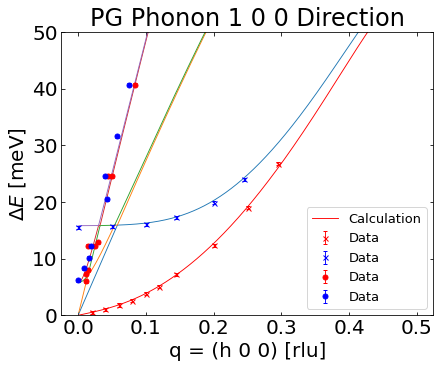

In [5]:
################################## Calculate dispersion 100 #############################

qstep_100=0.001;
eq = np.array([1, 0, 0])  
leq = np.linalg.norm(eq)
eq = np.divide(eq,leq) #unit vector in q direction
omega_list_100 = []
q_list_100 = []
cos_list_100 = []

Zero_3Dim = np.zeros((3,3))

for q in np.arange(qstep_100,0.5,qstep_100):

    qvec = np.array([astar, astar, cstar])*eq*q*leq
    
    
    Phi_diag  = (Phi1 +Phi2 +Phi3 +Phi4*(1-np.exp(1.j*qvec.dot(r_j1[3,:].conj().T)))
                 +Phi5*(1-np.exp(1.j*qvec.dot(r_j1[4,:].conj().T)))+Phi6*(1-np.exp(1.j*qvec.dot(r_j1[5,:].conj().T)))
                 +Phi7*(1-np.exp(1.j*qvec.dot(r_j1[6,:].conj().T)))+Phi8*(1-np.exp(1.j*qvec.dot(r_j1[7,:].conj().T)))
                 +Phi9*(1-np.exp(1.j*qvec.dot(r_j1[8,:].conj().T)))+Phi10+Phi11+Phi12)

    Phi_diag1 = Phi13+Phi14
    
    Phi_offdiag1 = (-Phi1*np.exp(1.j*qvec.dot(r_j1[0,:].conj().T))-Phi2*np.exp(1.j*qvec.dot(r_j1[1,:].conj().T))
                    -Phi3*np.exp(1.j*qvec.dot(r_j1[2,:].conj().T))-Phi10*np.exp(1.j*qvec.dot(r_j1[9,:].conj().T))
                    -Phi11*np.exp(1.j*qvec.dot(r_j1[10,:].conj().T))-Phi12*np.exp(1.j*qvec.dot(r_j1[11,:].conj().T)))
    
    Phi_offdiag2 = (-Phi1*np.exp(1.j*qvec.dot(r_j2[0,:].conj().T))-Phi2*np.exp(1.j*qvec.dot(r_j2[1,:].conj().T))  
                    -Phi3*np.exp(1.j*qvec.dot(r_j2[2,:].conj().T))-Phi10*np.exp(1.j*qvec.dot(r_j2[9,:].conj().T))
                    -Phi11*np.exp(1.j*qvec.dot(r_j2[10,:].conj().T))-Phi12*np.exp(1.j*qvec.dot(r_j2[11,:].conj().T)))
                    #identical the to complex conjugate of Phi_offdiag1


    
    Phi_6Dim1 = np.concatenate((Phi_diag+Phi_diag1, Phi_offdiag1), axis=1)
    Phi_6Dim2 = np.concatenate((Phi_offdiag2, Phi_diag), axis=1)
    Phi_6Dim = np. concatenate((Phi_6Dim1, Phi_6Dim2), axis=0)
    
    Phi_AC = -Phi13*np.exp(1.j*qvec.dot(r_j1[12,:].conj().T))-Phi14*np.exp(1.j*qvec.dot(r_j1[13,:].conj().T))
    
    Phi_6Dim_offdiag1 = np.concatenate((Phi_AC, Zero_3Dim), axis=1)
    Phi_6Dim_offdiag2 = np.concatenate((Zero_3Dim, Zero_3Dim), axis=1)
    Phi_6Dim_offdiag = np.concatenate((Phi_6Dim_offdiag1, Phi_6Dim_offdiag2), axis=0)
    
    Phi_12Dim1 = np.concatenate((Phi_6Dim, Phi_6Dim_offdiag), axis = 1)
    Phi_12Dim2 = np.concatenate((Phi_6Dim_offdiag.conj(),Phi_6Dim), axis = 1)
    Phi_12Dim = np.concatenate((Phi_12Dim1, Phi_12Dim2),axis=0)
    
    #print(pd.DataFrame(Phi_12Dim))
    
    Phi_12Dim = np.asmatrix(Phi_12Dim)
    
    E,V = np.linalg.eig(Phi_12Dim)
    E = E.real
    
    omega = np.sqrt(E/M)/(2*np.pi*1e12)
    omega = np.sort(omega)
    
    #cosines = V'*[eq' ; eq'; eq'; eq'];
    #om_cos = [omega cosines];
    #om_cos_sort = sortrows(om_cos,1,'ascend');
    #q_list = [q_list q];
    #omega_list = [omega_list om_cos_sort(:,1)];
    #cos_list = [cos_list abs(om_cos_sort(:,2))];

    
    q_list_100.append(q)
    omega_list_100.append(omega)


omega_list_100 = np.asarray(omega_list_100)*to_meV
cos_list_100 = np.asarray(cos_list_100)
q_list_100 = np.asarray(q_list_100)

#print(omega_list_100[:,0])

plt.figure(figsize=(6,5))
plt.plot(q_list_100,omega_list_100[:,0],'r-', label='Calculation')
plt.plot(q_list_100,omega_list_100[:,1],'-')
plt.plot(q_list_100,omega_list_100[:,2],'-')
plt.plot(q_list_100,omega_list_100[:,3],'-')
plt.plot(q_list_100,omega_list_100[:,4],'-')
plt.plot(q_list_100,omega_list_100[:,5],'-')
plt.plot(q_list_100,omega_list_100[:,6],'-')
plt.plot(q_list_100,omega_list_100[:,7],'-')
plt.plot(q_list_100,omega_list_100[:,8],'-')
plt.plot(q_list_100,omega_list_100[:,9],'-')
plt.plot(q_list_100,omega_list_100[:,10],'-')
plt.plot(q_list_100,omega_list_100[:,11],'-')

Data_100_ta = Data_100_nu_ta*to_meV
Data_100_to = Data_100_nu_to*to_meV
Data_100_la = Data_100_nu_la*to_meV
Data_100_lo = Data_100_nu_lo*to_meV

Data_10_err_ta = Data_100_err_ta*to_meV
Data_10_err_to = Data_100_err_to*to_meV
Data_10_err_la = Data_100_err_la*to_meV
Data_10_err_lo = Data_100_err_lo*to_meV

plt.errorbar(Data_100_q_ta, Data_100_ta, Data_10_err_ta,fmt='rx', label='Data')
plt.errorbar(Data_100_q_to, Data_100_to, Data_10_err_to,fmt='bx', label='Data')
plt.errorbar(Data_100_q_la, Data_100_la, Data_10_err_la,fmt='ro', label='Data')
plt.errorbar(Data_100_q_lo, Data_100_lo, Data_10_err_lo,fmt='bo', label='Data')
plt.xlabel('q = (h 0 0) [rlu]')
plt.ylim(0,50)
plt.title('PG Phonon 1 0 0 Direction')
plt.ylabel(r'$\Delta E$ [meV]')
plt.legend(fontsize=13)

[[9.08597809e-03 9.08597832e-03 2.49367772e-02 ... 1.95451104e+02
  1.95536752e+02 1.95536752e+02]
 [1.81719340e-02 1.81719341e-02 4.98734915e-02 ... 1.95451104e+02
  1.95536751e+02 1.95536751e+02]
 [2.72578451e-02 2.72578451e-02 7.48100795e-02 ... 1.95451105e+02
  1.95536750e+02 1.95536750e+02]
 ...
 [4.06992629e+00 4.06992629e+00 4.10844938e+00 ... 1.95493510e+02
  1.95494317e+02 1.95494317e+02]
 [4.07637202e+00 4.07637202e+00 4.10205414e+00 ... 1.95493645e+02
  1.95494183e+02 1.95494183e+02]
 [4.08280769e+00 4.08280769e+00 4.09564876e+00 ... 1.95493779e+02
  1.95494048e+02 1.95494048e+02]]


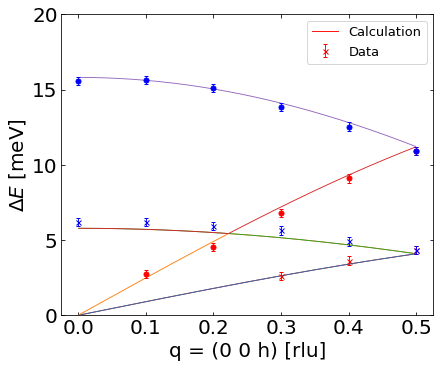

In [6]:
############################### Calculate dispersion 001 ###############################


qstep_001=0.001;
eq = np.array([0, 0, 1])  
leq = np.linalg.norm(eq)
eq = np.divide(eq,leq) #unit vector in q direction
omega_list_001 = []
q_list_001 = []
cos_list_001 = []

Zero_3Dim = np.zeros((3,3))

for q in np.arange(qstep_001,0.5,qstep_001):

    qvec = np.array([astar, astar, cstar])*eq*q*leq
                
    Phi_diag  = (Phi1 +Phi2 +Phi3 +Phi4*(1-np.exp(1.j*qvec.dot(r_j1[3,:].conj().T)))
                 +Phi5*(1-np.exp(1.j*qvec.dot(r_j1[4,:].conj().T)))+Phi6*(1-np.exp(1.j*qvec.dot(r_j1[5,:].conj().T)))
                 +Phi7*(1-np.exp(1.j*qvec.dot(r_j1[6,:].conj().T)))+Phi8*(1-np.exp(1.j*qvec.dot(r_j1[7,:].conj().T)))
                 +Phi9*(1-np.exp(1.j*qvec.dot(r_j1[8,:].conj().T)))+Phi10+Phi11+Phi12)
                
    Phi_diag1 = Phi13+Phi14
    
    Phi_offdiag1 = (-Phi1*np.exp(1.j*qvec.dot(r_j1[0,:].conj().T))-Phi2*np.exp(1.j*qvec.dot(r_j1[1,:].conj().T))
                    -Phi3*np.exp(1.j*qvec.dot(r_j1[2,:].conj().T))-Phi10*np.exp(1.j*qvec.dot(r_j1[9,:].conj().T))
                    -Phi11*np.exp(1.j*qvec.dot(r_j1[10,:].conj().T))-Phi12*np.exp(1.j*qvec.dot(r_j1[11,:].conj().T)))
    
    Phi_offdiag2 = (-Phi1*np.exp(1.j*qvec.dot(r_j2[0,:].conj().T))-Phi2*np.exp(1.j*qvec.dot(r_j2[1,:].conj().T))  
                    -Phi3*np.exp(1.j*qvec.dot(r_j2[2,:].conj().T))-Phi10*np.exp(1.j*qvec.dot(r_j2[9,:].conj().T))
                    -Phi11*np.exp(1.j*qvec.dot(r_j2[10,:].conj().T))-Phi12*np.exp(1.j*qvec.dot(r_j2[11,:].conj().T)))
                    #identical the to complex conjugate of Phi_offdiag1

    Phi_6Dim1 = np.concatenate((Phi_diag+Phi_diag1, Phi_offdiag1), axis=1)
    Phi_6Dim2 = np.concatenate((Phi_offdiag2, Phi_diag), axis=1)
    Phi_6Dim = np. concatenate((Phi_6Dim1, Phi_6Dim2), axis=0)
    
    Phi_AC = -Phi13*np.exp(1.j*qvec.dot(r_j1[12,:].conj().T))-Phi14*np.exp(1.j*qvec.dot(r_j1[13,:].conj().T))
    
    Phi_6Dim_offdiag1 = np.concatenate((Phi_AC, Zero_3Dim), axis=1)
    Phi_6Dim_offdiag2 = np.concatenate((Zero_3Dim, Zero_3Dim), axis=1)
    Phi_6Dim_offdiag = np.concatenate((Phi_6Dim_offdiag1, Phi_6Dim_offdiag2), axis=0)
    
    Phi_12Dim1 = np.concatenate((Phi_6Dim, Phi_6Dim_offdiag), axis = 1)
    Phi_12Dim2 = np.concatenate((Phi_6Dim_offdiag.conj(),Phi_6Dim), axis = 1)
    Phi_12Dim = np.concatenate((Phi_12Dim1, Phi_12Dim2),axis=0)
    
    Phi_12Dim = np.asmatrix(Phi_12Dim)
    
    E,V = np.linalg.eig(Phi_12Dim)
    E = E.real
    
    omega = np.sqrt(E/M)/(2*np.pi*1e12)
    omega = np.sort(omega)
    
    q_list_001.append(q)
    omega_list_001.append(omega)


omega_list_001 = np.asarray(omega_list_001)*to_meV
cos_list_001 = np.asarray(cos_list_001)
q_list_001 = np.asarray(q_list_001)

#print(omega_list_100[:,0])

plt.figure(figsize=(6,5))
plt.plot(q_list_001,omega_list_001[:,0],'-r', label='Calculation')
plt.plot(q_list_001,omega_list_001[:,1])
plt.plot(q_list_001,omega_list_001[:,2])
plt.plot(q_list_001,omega_list_001[:,3])
plt.plot(q_list_001,omega_list_001[:,4])
plt.plot(q_list_001,omega_list_001[:,5])
plt.plot(q_list_001,omega_list_001[:,6])
plt.plot(q_list_001,omega_list_001[:,7])
plt.plot(q_list_001,omega_list_001[:,8])
plt.plot(q_list_001,omega_list_001[:,9])
plt.plot(q_list_001,omega_list_001[:,10])
plt.plot(q_list_001,omega_list_001[:,11])

Data_001_ta = Data_001_nu_ta*to_meV
Data_001_to = Data_001_nu_to*to_meV
Data_001_la = Data_001_nu_la*to_meV
Data_001_lo = Data_001_nu_lo*to_meV

Data_01_err_ta = Data_001_err_ta*to_meV
Data_01_err_to = Data_001_err_to*to_meV
Data_01_err_la = Data_001_err_la*to_meV
Data_01_err_lo = Data_001_err_lo*to_meV

plt.errorbar(Data_001_q_ta, Data_001_ta, Data_01_err_ta,fmt='rx', label = 'Data')
plt.errorbar(Data_001_q_to, Data_001_to, Data_01_err_to,fmt='bx')
plt.errorbar(Data_001_q_la, Data_001_la, Data_01_err_la,fmt='ro')
plt.errorbar(Data_001_q_lo, Data_001_lo, Data_01_err_lo,fmt='bo')
plt.xlabel('q = (0 0 h) [rlu]')
plt.ylim(0,20)
plt.ylabel(r'$\Delta E$ [meV]')
plt.legend(fontsize=13)


print(omega_list_001)

### Chikvadrat- udregning

In [7]:
# For alle
q_value0 = np.array([0.001])
q_value0 = np.append(q_value0, q_list_001[49::50])
q_value0 = np.append(q_value0, q_list_001[498])
q_value = np.array([])
q_value = ((np.flip(q_value0, 0))*(-1))
q_value = np.append(q_value, q_value0)
print(q_value)

# Pr phononmode

def e_value(k):
    e_value = np.array(omega_list_001[0,k])
    e_value = np.append(e_value, omega_list_001[49::50, k])
    e_value = np.append(e_value, omega_list_001[498, k])
    return e_value

E_phonon = [0,0,0,0,0,0]

for i in range(6):
    phonon = np.flip(e_value(i), 0)
    phonon = np.append(phonon[:-1], e_value(i))
    print(phonon)
    E_phonon[i] = phonon


[-0.499 -0.45  -0.4   -0.35  -0.3   -0.25  -0.2   -0.15  -0.1   -0.05
 -0.001  0.001  0.05   0.1    0.15   0.2    0.25   0.3    0.35   0.4
  0.45   0.499]
[4.08280769 3.75591869 3.3994211  3.02193537 2.62578741 2.21341987
 1.78737715 1.35028949 0.90485666 0.45383097 0.00908598 0.45383097
 0.90485666 1.35028949 1.78737715 2.21341987 2.62578741 3.02193537
 3.3994211  3.75591869 4.08280769]
[4.08280769 3.75591869 3.3994211  3.02193537 2.62578741 2.21341987
 1.78737715 1.35028949 0.90485666 0.45383097 0.00908598 0.45383097
 0.90485666 1.35028949 1.78737715 2.21341987 2.62578741 3.02193537
 3.3994211  3.75591869 4.08280769]
[4.09564876 4.39731439 4.67826833 4.93036959 5.15207103 5.3420131
 4.90373443 3.70514689 2.48317868 1.24552539 0.02493678 1.24552539
 2.48317868 3.70514689 4.90373443 5.3420131  5.15207103 4.93036959
 4.67826833 4.39731439 4.09564876]
[4.09564876 4.39731439 4.67826833 4.93036959 5.15207103 5.3420131
 5.49903178 5.62216539 5.71066012 5.76397445 5.78177508 5.76397445
 5.71

In [8]:
q_value =[x / 20 for x in range(70,91)]
print(q_value)

[3.5, 3.55, 3.6, 3.65, 3.7, 3.75, 3.8, 3.85, 3.9, 3.95, 4.0, 4.05, 4.1, 4.15, 4.2, 4.25, 4.3, 4.35, 4.4, 4.45, 4.5]


phononmode 0 chi2 79928.22593833016 redchi2 3806.105997063341
phononmode 1 chi2 189681.34228653117 redchi2 9032.444870787198
phononmode 2 chi2 133106.8822718106 redchi2 6338.422965324315
phononmode 3 chi2 62636.30118232632 redchi2 2982.6810086822056
phononmode 4 chi2 38712.056365257245 redchi2 1843.4312554884402
phononmode 5 chi2 2664.7088218470994 redchi2 126.8908962784333


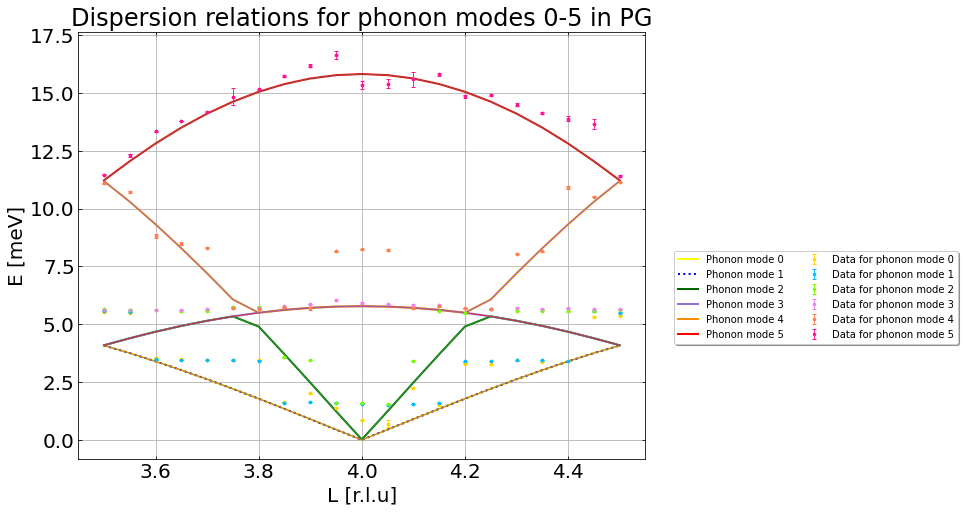

In [9]:
def chisqrt(k, phonondata, phononerror):
    print('phononmode',k,'chi2', np.sum(((phonondata-E_phonon[k])/phononerror)**2), 'redchi2', np.sum(((phonondata-E_phonon[k])/phononerror)**2)/21)

plt.figure(figsize=(13,7))
plt.plot(q_value, E_phonon[0], '-', linewidth=2, color='yellow', label = ('Phonon mode 0'))
plt.plot(q_value, E_phonon[1], ':', linewidth=2, color='b', label = ('Phonon mode 1'))
plt.plot(q_value, E_phonon[2], '-', linewidth=2, color='darkgreen', label = ('Phonon mode 2'))
plt.plot(q_value, E_phonon[3], '-',linewidth=2, color='mediumpurple', label = ('Phonon mode 3'))
plt.plot(q_value, E_phonon[4], '-', linewidth=2, color='darkorange', label = ('Phonon mode 4'))
plt.plot(q_value, E_phonon[5], '-',  linewidth=2, color='red', label = ('Phonon mode 5'))
plt.grid()
plt.xlabel('L [r.l.u]')
plt.ylabel('E [meV]')
plt.title('Dispersion relations for phonon modes 0-5 in PG')
plt.legend(fontsize = 10, loc = 'upper left')

for i in range(6):
    colors = ['gold', 'deepskyblue', 'lawngreen', 'violet', 'coral', 'deeppink']
    phonondat = np.genfromtxt('phonondata/Phononmode{}.dat'.format(i))
    plt.plot(phonondat[:,0], phonondat[:,1], '.', color = ('{}'.format(colors[i])))
    plt.plot(q_value, E_phonon[i], '-')
    plt.errorbar(phonondat[:,0], phonondat[:,1], phonondat[:,2], fmt = ".", label = ('Data for phonon mode {}'.format(i)), c = ('{}'.format(colors[i])))
    chisqrt(i, phonondat[:,1], phonondat[:,2])
    plt.legend(fontsize = 10, loc='upper center', bbox_to_anchor=(1.3, 0.5), ncol=2, fancybox=True, shadow=True)

In [10]:
## Udregning Chi-kvadrat


    

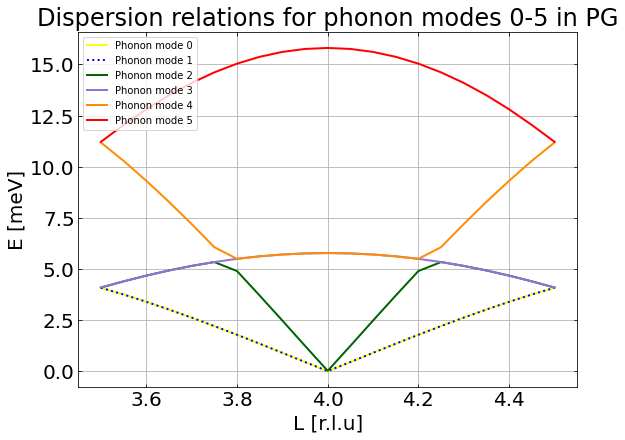

In [11]:
plt.figure(figsize=(8,6))
plt.plot(q_value, E_phonon[0], '-', linewidth=2, color='yellow', label = ('Phonon mode 0'))
plt.plot(q_value, E_phonon[1], ':', linewidth=2, color='b', label = ('Phonon mode 1'))
plt.plot(q_value, E_phonon[2], '-', linewidth=2, color='darkgreen', label = ('Phonon mode 2'))
plt.plot(q_value, E_phonon[3], '-',linewidth=2, color='mediumpurple', label = ('Phonon mode 3'))
plt.plot(q_value, E_phonon[4], '-', linewidth=2, color='darkorange', label = ('Phonon mode 4'))
plt.plot(q_value, E_phonon[5], '-',  linewidth=2, color='red', label = ('Phonon mode 5'))
plt.grid()
plt.xlabel('L [r.l.u]')
plt.ylabel('E [meV]')
plt.title('Dispersion relations for phonon modes 0-5 in PG')
plt.legend(fontsize = 10, loc = 'upper left')